# Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.options.display.max_columns = 50

In [3]:
#importing day.csv
boombike=pd.read_csv("day.csv")

In [4]:
# Looking at the first five rows
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Get basic idea of data using describe()
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for null values in dataset
boombike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Droping columns which are not necessary in building model.
# instant is an index column so we drop it.
# dteday and yr month are having same data so we can drop dteday
# casual+registered=cnt and cnt is our target variable.so dropping casual and registered
boombike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [8]:
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables so replacing with proper values

In [9]:
boombike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
boombike.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [11]:
boombike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
boombike.weathersit.replace({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"},inplace=True)

In [13]:
boombike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [14]:
boombike.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [15]:
boombike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [16]:
boombike.mnth.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

In [17]:
boombike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [18]:
#checking for datatypes of columns
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [19]:
boombike.cnt=boombike['cnt'].astype("float64")

In [20]:
def plot(x,y):
    sns.distplot(x[y])
    plt.show();

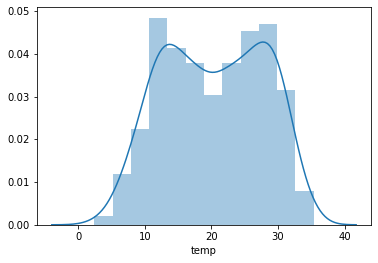

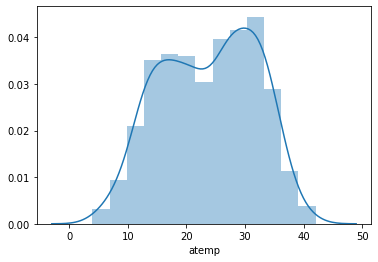

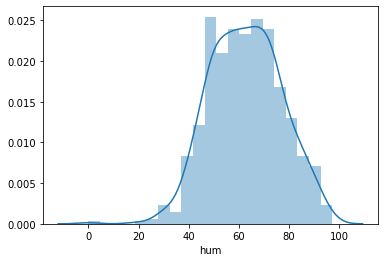

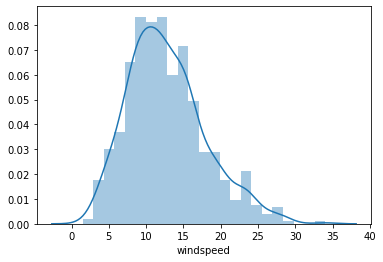

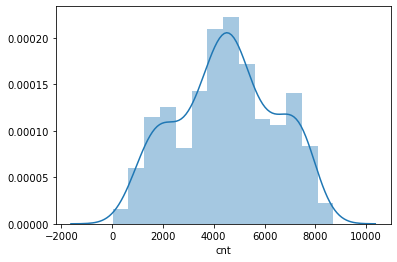

In [21]:
# Distribution for numerical variables.
num_col=boombike[['temp','atemp','hum','windspeed','cnt']]
for columns in num_col.describe().columns:
    plot(boombike,columns)

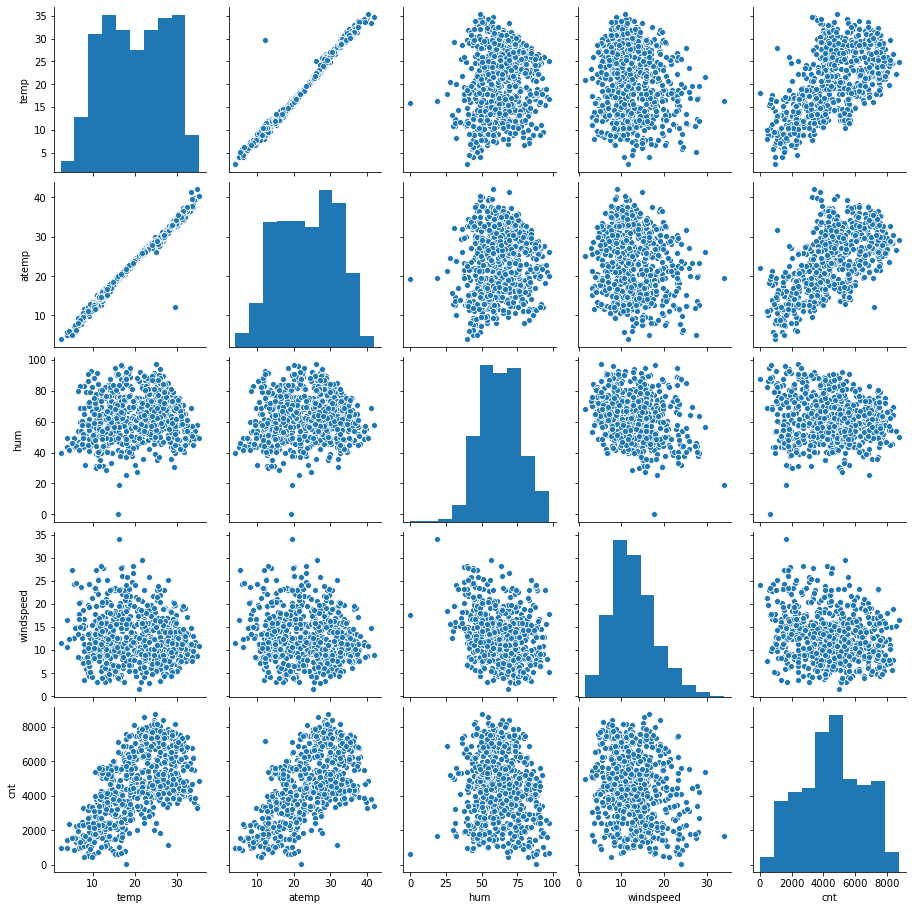

In [22]:
# Pairplots for numerical variables
sns.pairplot(boombike,vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

From above graphs we can see that temp and atemp have a linear relationship.

In [23]:
cat_col=boombike.select_dtypes(exclude=['float64'])

In [24]:
def box_plot(dataframe,column):
    sns.boxplot(x=column,y='cnt',data=dataframe)
   
    plt.show();

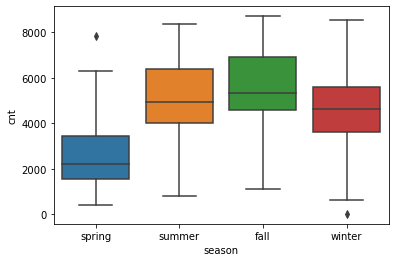

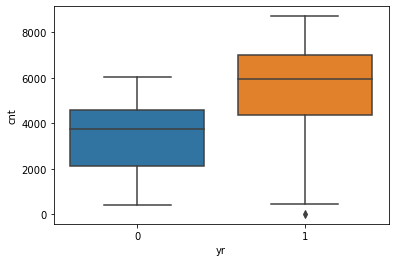

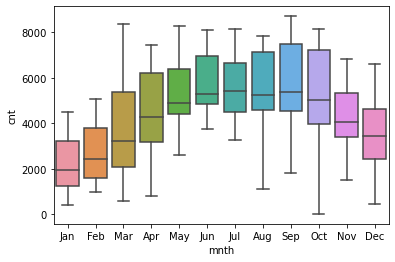

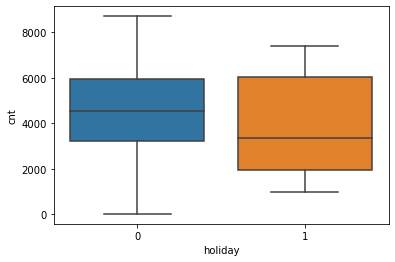

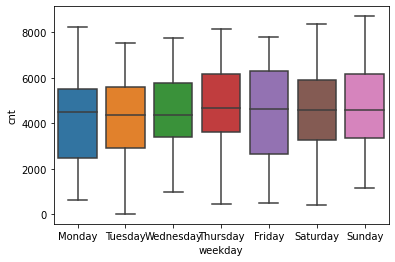

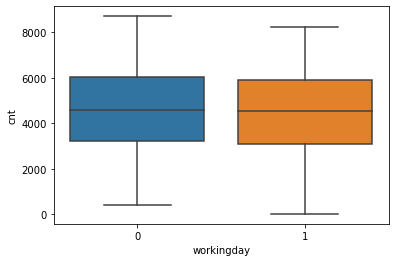

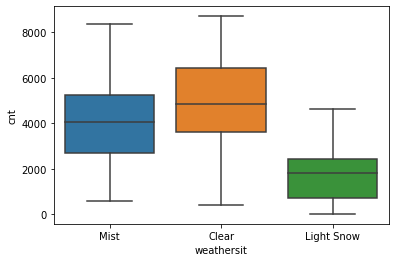

In [25]:
# visualising categorical variables to understand data.
for columns in cat_col.columns:
    box_plot(boombike,columns)

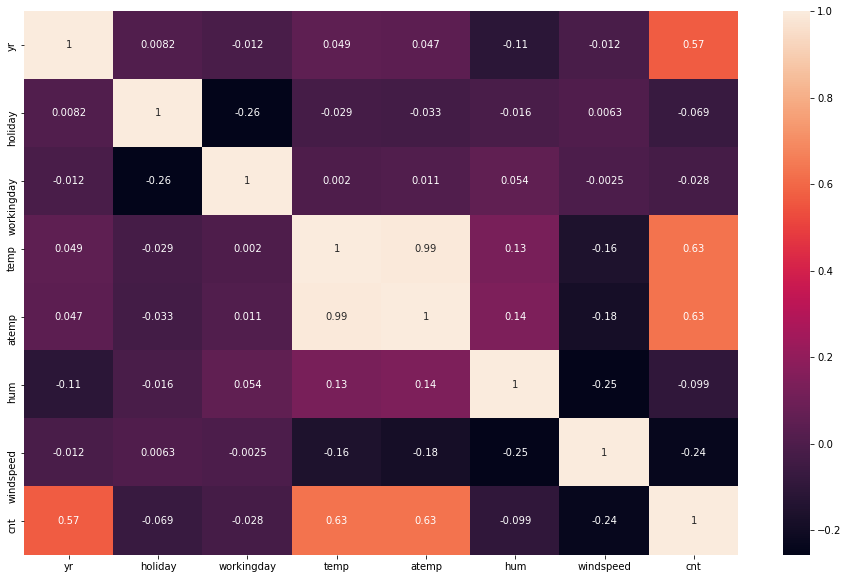

In [26]:
# check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(boombike.corr(), annot = True)
plt.show()


correlation between temp and atemp is 0.99 which is almost 1

In [27]:
# dropping temp to avoid mulitcolinearity
boombike.drop(['temp'],axis=1,inplace=True)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,18.18125,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600.0


### Creating dummy variables

In [28]:
# creating dummy variables for categorical data
col_season=pd.get_dummies(boombike['season'],drop_first=True)
boombike=pd.concat([boombike,col_season],axis=1)
col_weather=pd.get_dummies(boombike['weathersit'],drop_first=True)
boombike=pd.concat([boombike,col_weather],axis=1)
col_day=pd.get_dummies(boombike['weekday'],drop_first=True)
boombike=pd.concat([boombike,col_day],axis=1)
col_month=pd.get_dummies(boombike['mnth'],drop_first=True)
boombike=pd.concat([boombike,col_month],axis=1)
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  Light Snow  730 non-null    uint8  
 15  Mist        730 non-null    uint8  
 16  Monday      730 non-null    uint8  
 17  Saturday    730 non-null    uint8  
 18  Sunday      730 non-null    uint8  
 19  Thursday    730 non-null    u

In [29]:
# Dropping the orginal columns season,weathersit,weekday,mnth
boombike.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
boombike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,18.18125,80.5833,10.749882,985.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# spliting data into train and test data.
from sklearn.model_selection import train_test_split

boom_train,boom_test= train_test_split(boombike,train_size=0.7,test_size=0.3 ,random_state=100)

In [31]:
boom_train.shape

(510, 29)

In [32]:
boom_test.shape

(219, 29)

In [33]:
# Scaling the numerical data.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [34]:
numvar=['atemp','hum','windspeed','cnt']
boom_train[numvar]=scaler.fit_transform(boom_train[numvar])
boom_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
boom_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# creating X and y
y_train=boom_train.pop('cnt')
X_train=boom_train

In [37]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Using mix approach to build model. First selecting features using RFE then manually checking for better fit.

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 10),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [42]:
X_rfe=X_train[X_train.columns[rfe.support_]]

### Building model using statsmodel

In [43]:
import statsmodels.api as sm
X_train_con=sm.add_constant(X_rfe)
lm=sm.OLS(y_train,X_train_con).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.26e-186
Time:                        18:48:00   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2936      0.032      9.289      0.0

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
8,Mist,2.24
0,yr,2.06
12,Jan,1.92
13,Nov,1.85
10,Dec,1.63


### Column hum (humidity) has high VIF value , so dropping it

In [45]:
X_rfe1=X_rfe.drop(['hum'],axis=1)

In [46]:
#import statsmodels.api as sm
X_train_con1=sm.add_constant(X_rfe1)

In [47]:
lm1=sm.OLS(y_train,X_train_con1).fit()

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.00e-184
Time:                        18:48:01   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.026      8.281      0.0

In [49]:
vif = pd.DataFrame()
X = X_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
12,Nov,1.81
8,Aug,1.59
7,Mist,1.57
9,Dec,1.41
13,Sep,1.35


### As we can see VIF values are less than 5 . Also p-values are less than 0.05 which show all these predictor variables can be used for fiting a best line. Although VIF values of atemp and windspeed are closed to 5 but they are playing important role in prediction. so we are not dropping those. 

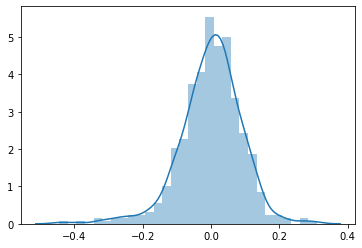

In [50]:
# predict values using lm1 model
y_train_pred=lm1.predict(X_train_con1)
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

Error terms are normally distrubuted and mean is zero.

Text(0, 0.5, 'Error(Train Data)')

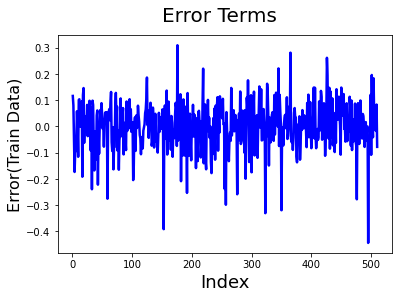

In [51]:
#checking for error terms are independent of each other not.
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('Error(Train Data)', fontsize=16)  

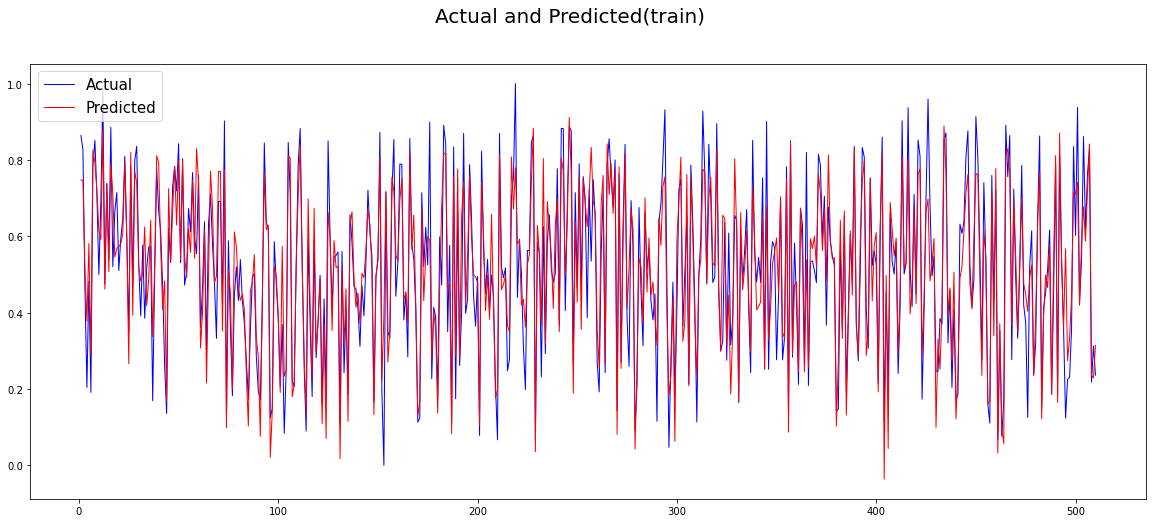

In [52]:
# Actual vs predicted
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=1, linestyle="-",label='Actual')
plt.plot(c,y_train_pred, color="red",  linewidth=1, linestyle="-",label='Predicted')
fig.set_size_inches(20,8)  
fig.suptitle('Actual and Predicted(train)',fontsize=20)
plt.legend(loc='upper left',prop={'size':15})
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
r_squared_train = r2_score(y_train, y_train_pred)

In [54]:
print('Mean_Squared_Error :' ,mse_train)
print('r_square_value :',r_squared_train)

Mean_Squared_Error : 0.008263585618736307
r_square_value : 0.8358540764456329


### Using test data in model

In [55]:
numvar_test=['atemp','hum','windspeed','cnt']
boom_test[numvar_test]=scaler.fit_transform(boom_test[numvar_test])
boom_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.778767,0.534223,0.149393,0.704300,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0.725421,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.492359,0.777843,0.443398,0.278853,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0.545512,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.749249,0.070765,0.682387,0.569148,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
y_test=boom_test.pop('cnt')
X_test=boom_test

In [57]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.778767,0.534223,0.149393,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.492359,0.777843,0.443398,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.749249,0.070765,0.682387,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [58]:
X_test=X_test[X_train_con1.drop(['const'],axis=1).columns]
X_test.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter', 'Light Snow',
       'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep'],
      dtype='object')

In [59]:
X_test=sm.add_constant(X_test)
X_test.head()

,const,yr,holiday,atemp,windspeed,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Nov,Sep
184,1.0,0,1,0.778767,0.149393,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,0.855132,0.231142,1,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.492359,0.443398,0,1,0,1,0,0,0,0,0,0
221,1.0,0,0,0.805661,0.449707,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,0.749249,0.682387,1,0,0,0,0,0,0,0,0,0


In [60]:
y_test_pred=lm1.predict(X_test)

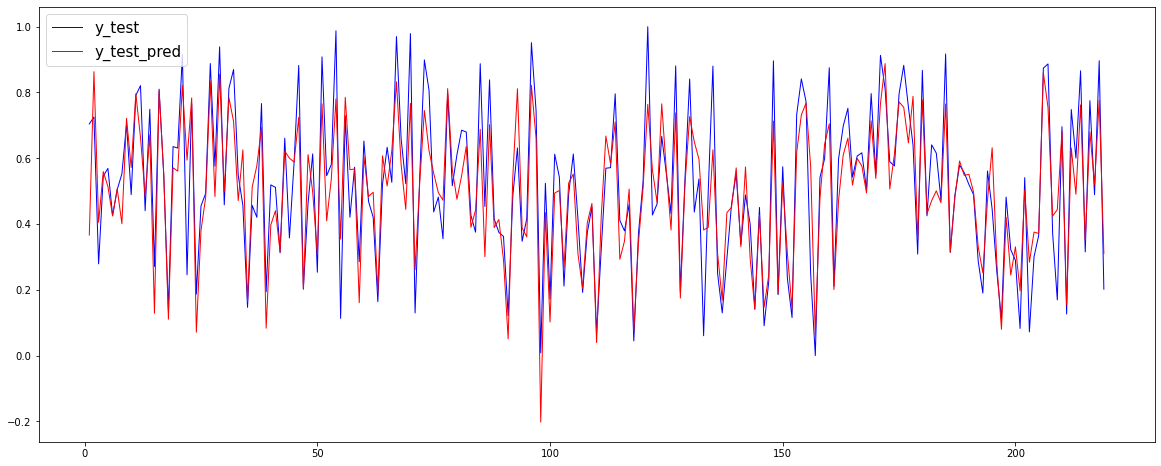

In [61]:
## Actual vs predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-",label='y_test')
plt.plot(c,y_test_pred, color="red",  linewidth=1, linestyle="-",label='y_test_pred')
fig.set_size_inches(20,8)  
plt.legend(loc='upper left',prop={'size':15})
plt.show()

In [62]:
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse_test)
print('r_square_value :',r_squared_test)

Mean_Squared_Error : 0.011517341194932695
r_square_value : 0.7969379860832524


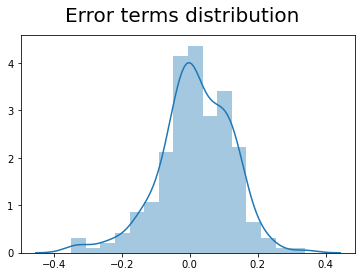

In [63]:
# Errors
res=y_test-y_test_pred
fig = plt.figure()
fig.suptitle('Error terms distribution',fontsize=20)
sns.distplot(res)
plt.show()

Text(0, 0.5, 'Error')

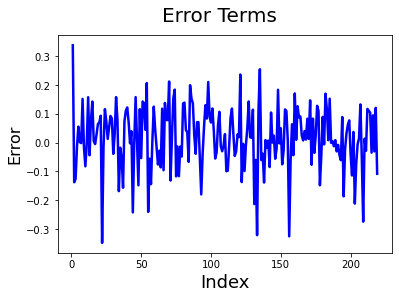

In [64]:
# Error terms independancy
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('Error', fontsize=16)              

In [65]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.00e-184
Time:                        18:48:02   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.026      8.281      0.0

## We can see that the equation for best fitted line is:

### cnt=0.211+0.235 * yr - 0.085 * holiday +0.443 * atemp -0.15 * windspeed + 0.072 * summer + 0.124 * winter -0.287                   Light Snow - 0.082 * Mist +0.058 * Aug - 0.058 Dec - 0.057 Feb - 0.88 * Jan - 0.044 * Nov +0.104 * Sep

 Demand increases if either one of these will increase, those include yr,atemp,summer,winter,Aug, Sep 
 
 Demand decreases if either one of these will increase, those include holiday,windspeed,Light Snow,Mist,Dec,Feb,Jan,Nov.

### Final Conclusion : Demand is higher in August and September, Also in Summer and Winter.

Based on final model top three features contributing significantly towards explaining the demand are:

1.feeling temperature in Celsius(similar to temperature):atemp -coefficient is 0.443

2.Weathersit : Light Snow -coefficient is 0.287

3.Year:yr-coefficient is 0.235